# Covid19 Analysis Demo
This jupyter notebook allows one to compare groups of states using the data from covidtracking.com
in a per capita basis or with raw numbers...

In [10]:
from covid19 import *
import matplotlib.pyplot as plt
import numpy as np
import json

In [11]:
cdata = get_covid_data()

In [70]:
stateData = json.load(open("states.json","r"))
states = {
    "AL": "Alabama",
    "AK": "Alaska",
    #"AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    #"DC": "District Of Columbia",
    #"FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    #"GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    #"MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    #"MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    #"PW": "Palau",
    "PA": "Pennsylvania",
    #"PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    #"VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}
len(states.keys())

50

In [13]:
len(cdata[0])
states['WA']
stateData['data'][0]

def statePop(state):
    x = [d['Pop'] for d in stateData['data'] if d['State']==states[state]]
    return x[0]
statePop('NY')



19440469

In [14]:
cdata[0][10]

{'date': 20200710,
 'state': 'FL',
 'positive': 244151,
 'negative': 2177476,
 'pending': 1911,
 'hospitalizedCurrently': 6974,
 'hospitalizedCumulative': 17916,
 'inIcuCurrently': None,
 'inIcuCumulative': None,
 'onVentilatorCurrently': None,
 'onVentilatorCumulative': None,
 'recovered': None,
 'dataQualityGrade': 'A',
 'lastUpdateEt': '7/9/2020 23:59',
 'dateModified': '2020-07-09T23:59:00Z',
 'checkTimeEt': '07/09 19:59',
 'death': 4203,
 'hospitalized': 17916,
 'dateChecked': '2020-07-09T23:59:00Z',
 'totalTestsViral': 2945253,
 'positiveTestsViral': 305374,
 'negativeTestsViral': 2633526,
 'positiveCasesViral': 244151,
 'deathConfirmed': 4203,
 'deathProbable': None,
 'fips': '12',
 'positiveIncrease': 11433,
 'negativeIncrease': 52796,
 'total': 2423538,
 'totalTestResults': 2421627,
 'totalTestResultsIncrease': 64229,
 'posNeg': 2421627,
 'deathIncrease': 92,
 'hospitalizedIncrease': 437,
 'hash': '3968c03124ccdd661df0cc1695af0e15560f692c',
 'commercialScore': 0,
 'negativeReg

In [15]:
dates = sorted(list({ x['date'] for x in cdata[0]}))
dayOfPandemic={}
count=22
for d in dates:
    dayOfPandemic[d]=count
    count = count + 1
#dayOfPandemic

In [16]:
def getField(x,field):
    if field in x:
        z = x[field]
        if (z==None):
            return 0
        else:
            return z
    else:
        return 0
def getStateData(state,field):
    sd = [(x['date'],getField(x,field)) for x in cdata[0] if x['state'] == state]
    return sorted(sd)

           

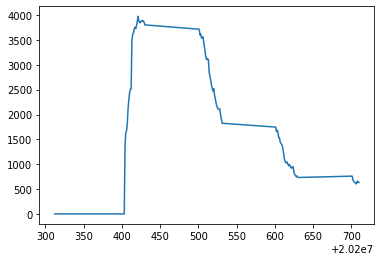

In [17]:
z = getStateData('MA','hospitalizedCurrently')
#plt.plot([x[0] for x in z],[x[1] for x in z])
def plotItems(items,field):
    plt.plot([x[0] for x in items],[x[1] for x in items],label=field)
plotItems(z,'label')

In [49]:
def weeklyAvg(L):
    week = [0,0,0,0,0,0,0]
    newL=[]
    for x in L:
        week = week[1:]+[x[1]]
        newL += [(x[0],sum(week)/7)]
    return newL

def collectData(states,field,options):
    perCapita = options['perCapita'] if 'perCapita' in options else False
    averageByWeek = options['averageByWeek'] if 'averageByWeek' in options else False
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += n
            else:
                data[d['date']] = n
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
    if averageByWeek:
        z = weeklyAvg(z)
        
    return z

def collectData2(states,field,perCapita):
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += [(n,s)]
            else:
                data[d['date']] = [(n,s)]
    for d in data: 
        data[d] = sorted(data[d],reverse=True)
        #print(data[d])
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
        
    return z



In [19]:
zz = collectData(['MA','NY','CT'],'positive',True,False)
zz[0:5]
x=[1,2]
x+=[4]
x

[1, 2, 4]

In [20]:

dayOfPandemic[20200122]


22

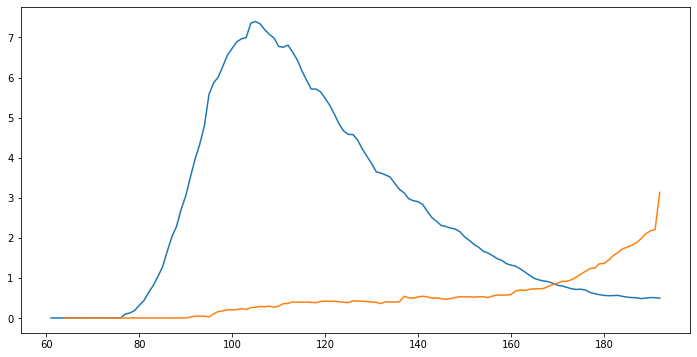

In [44]:
field = 'hospitalizedCurrently'
plotItems(collectData(['MA','NY','CT','RI','NH','VT'],field,{'perCapita':True}),field)
plotItems(collectData(['AZ','TX','OK','FL','GA','AL','MS'],field,{'perCapita':True}),field)


In [83]:
demStates = ['WA','OR','CA','NV','CO','NM',
            'MN','IL','VA','MD','DE','NJ',
            'NY','CT','RI','MA','VT','NH','ME','HI']
def otherStates(L):
    return [s for s in states.keys() if s not in L]
repStates = [s for s in states.keys() if s not in demStates]
def regionPop(states):
    pop=0
    for st in states:
        pop += statePop(st)
    return(pop)
print(regionPop(demStates))
print(regionPop())
#print(demStates)
#print(repStates)
len(demStates)+len(repStates)
dayOfPandemic[20200228]
cdata[0][-1]
zzz = collectData(repStates,field,{'perCapita':True})
list(dayOfPandemic.items())[0:20]
zzz[0:50]
len(demStates)
print(collectData(repStates,'hospitalizedCurrently',{'perCapita':False})[-10:])
print(sum([1,2,3]))

print(weeklyAvg(collectData(repStates,'hospitalizedCurrently',{'perCapita':False}))[-10:])
        
        

[(183, 21871), (184, 22750), (185, 23215), (186, 23630), (187, 24296), (188, 25308), (189, 26696), (190, 27515), (191, 28057), (192, 35817)]
6
[(183, 19540.0), (184, 20220.714285714286), (185, 20944.0), (186, 21621.14285714286), (187, 22381.714285714286), (188, 23154.0), (189, 23966.571428571428), (190, 24772.85714285714), (191, 25531.0), (192, 27331.285714285714)]


13.102902932306323
86.89709706769368


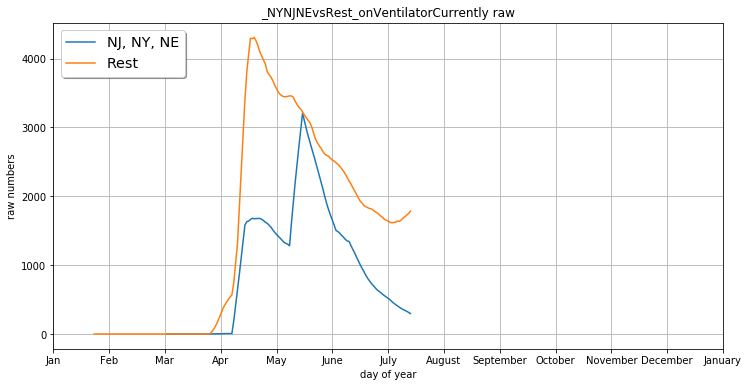

In [112]:
blueStates = ['NJ','MA','NY','CT','RI','VT','NH','ME'] 
redStates = otherStates(blueStates)
#['FL','AL','GA','MS','SC','NC','WV','KY','TN','VA','LA','TX','AR'] 
flag="_NYNJNEvsRest_"

#blueStates =  demStates
#redStates = repStates
#flag="_2020Election_"

bluePop = regionPop(blueStates)
redPop = regionPop(redStates)
totPop = bluePop+redPop

print(bluePop/totPop*100)
print(redPop/totPop*100)

perCapita=False
averageByWeek=True

plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
#field = 'positiveIncrease'
#field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"

plotItems(collectData(blueStates,field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),'NJ, NY, NE')
plotItems(collectData(redStates,field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),'Rest')
ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=flag+field+(" p10K" if perCapita else " raw"))
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May June July August September October November December January'.split(' '))
#plt.yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000])
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.grid()
fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")
